> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Non show appointments in Brasil dataset investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We are going to investigate the dataset of 100k medical appointments in Brazil to adress if patient shows up
for their appointment or not

In [95]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will be trying to explore the above mentioned issue taking into account that our dependent variable is showing up or not and our independent variables are Gender, Age, Scholarship and being handicapped or not

We will try to adress the following questions:

> Is no show-ups more common in males or females?

> Does sending SMS decrease chances of no show-ups?

> Is age a predictor for no show-ups?

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [96]:
# Loading our dataset as df
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [97]:
# Exploring dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [98]:
# Further exploring dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [99]:
# checking number of columns and rows
df.shape

(110527, 14)

In [100]:
# checking for unique values for each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [101]:
# Exploring dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we note that there is at least one entry with age -1 which cannot be true so that must be further investigated

In [102]:
df.Age[df.Age < 0]

99832   -1
Name: Age, dtype: int64

So we know which row has this negative value and we can drop it and then recheck the data

In [103]:
df.drop(99832, axis=0, inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [104]:
# Now checking duplicates
df.duplicated().sum()

0

In [105]:
# no duplicates found so we will proceede with null value checking
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> No null values here so we will proceede with the analysis

> We will drop PatientId and AppointmentID as they are irrelevant to our questions and recheck the database

In [106]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [107]:
# we will rename columns to lowercase and rename no-show column
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('-', '_')

df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [108]:
# we will duplicate no-show column into another one to ease analysis
df['show_or_not'] = df.no_show
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show_or_not
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No


In [109]:
# Now we will code the no_show cloumn into 0 and 1 where 0 in no show-up and 1 is show-up
df.no_show.replace(('Yes', 'No'), (0, 1), inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show_or_not
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,No


In [110]:
# Now we will code the no_show cloumn into 0 and 1 where 0 in no show-up and 1 is show-up
df.show_or_not.replace(('Yes', 'No'), ('no_show_up', 'show_up'), inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show_or_not
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,show_up
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,show_up
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,show_up
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,show_up
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,show_up


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is no show-ups more common in males or females?

Now we will split data into two parts one for show_ups 'showed' and the other is for no show_ups 'no_showed'

In [111]:
showed = df.no_show == 1
no_showed = df.no_show == 0

We will create two functions to help us in analysis

count_bar_chart for creating bar chart to show counts of different groups

proportion_bar_chart for creating bar chart to show proportions of different groups

In [143]:
def count_bar_chart(x_var,y_var):
    # for creating bar chart to show counts of different groups
    # x-var: the variable in x axis that data is grouped by it
    # y_var: the variable in the y axis
        df.groupby(x_var)[y_var].value_counts().unstack().plot.bar(
            figsize =[14,8], xlabel = x_var, ylabel = 'count', rot=0)

In [144]:
def proportion_bar_chart(x_var,y_var):
    # for creating bar chart to show proportions of different groups
    # x-var: the variable in x axis that data is grouped by it
    # y_var: the variable in the y axis
        df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(x_var).plot.bar(
            figsize =[14,8], xlabel = x_var, ylabel = 'proportion', rot=0)

We will make bar graph to compare gender and show_or_not groups

Text(0.5, 1.0, 'Gender And Showed Or Not Count Graph')

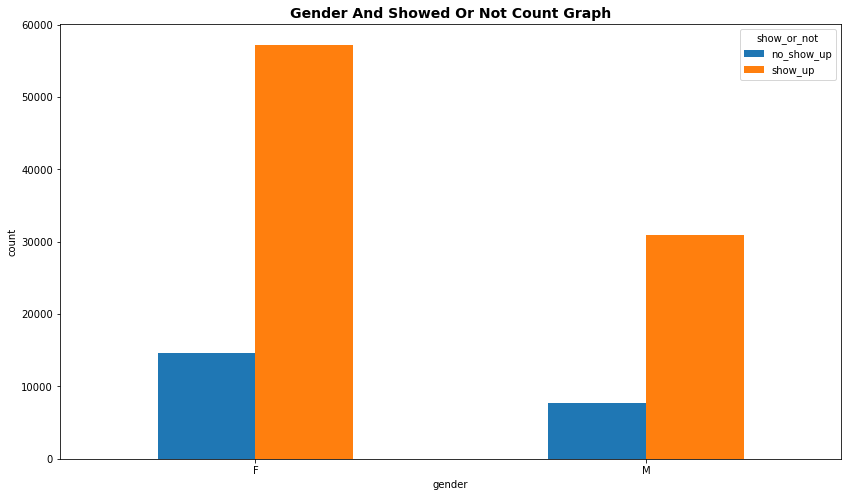

In [145]:
count_bar_chart('gender', 'show_or_not')
plt.title('Gender and showed or not count graph'.title(),
               fontsize = 14, weight = "bold")

As we can see the graph is not so informative since two groups have different counts so we have to compare proprotions of the two groups

Text(0.5, 1.0, 'Gender And Showed Or Not Proportion Graph')

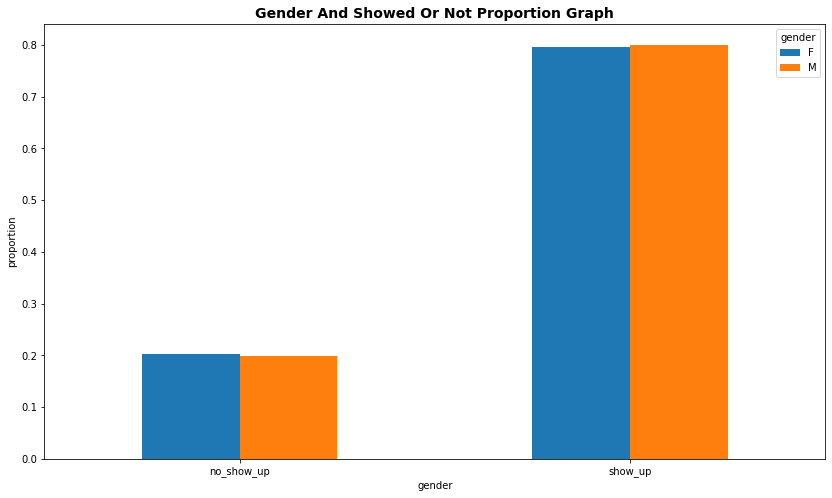

In [146]:
proportion_bar_chart('gender', 'show_or_not')
plt.title('Gender and showed or not proportion graph'.title(),
               fontsize = 14, weight = "bold")

This doesn't show a lot as there are different numbers in each group, so instead we will have to compare proportions

It is clear now that there is no difference in showing up among males and females

### Research Question 2: Does sending SMS decrease chances of no show-ups?

Text(0.5, 1.0, 'Sms Received And Showed Or Not Count Graph')

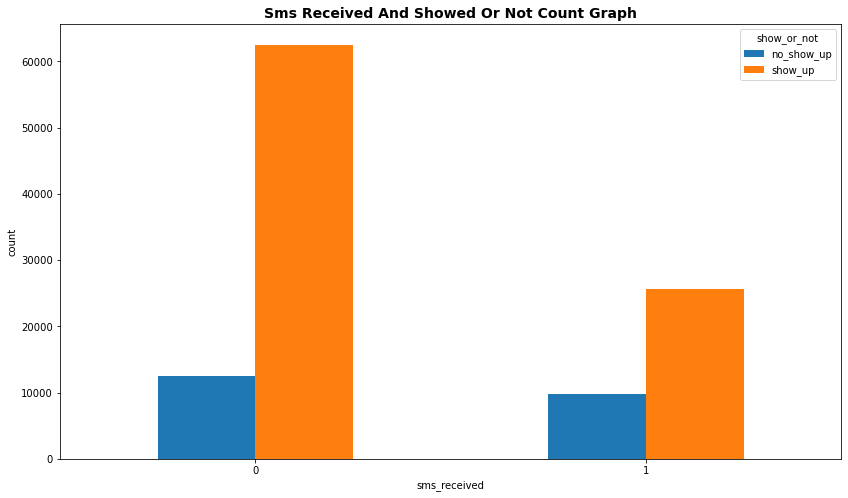

In [147]:
# We will create histogram of individuals receiving sms and not and showing-up or not
count_bar_chart('sms_received', 'show_or_not')
plt.title('SMS received and showed or not count graph'.title(),
               fontsize = 14, weight = "bold")

Like in the previous question, we couldn't assess whether receiving sms had an impact or not
So we will proceede like the previous question, by making proportions and then making bar chart

Text(0.5, 1.0, 'Sms Received And Showed Or Not Proportion Graph')

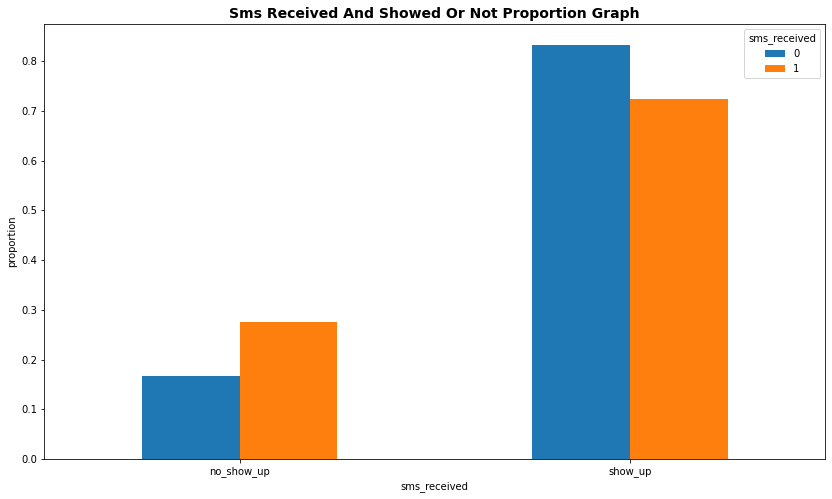

In [148]:
proportion_bar_chart('sms_received', 'show_or_not')
plt.title('SMS received and showed or not proportion graph'.title(),
               fontsize = 14, weight = "bold")

We can see there is no trend showing that sending sms decrease the likelihood of not showing_up

### Research Question 3: Is age a predictor for no show-ups?

To address this question we will have to create age groups first

In [118]:
# we will make bin egdges and bin names 
# then create a new column in the dataframe named age_groups that indicates age group
# the checking data to make sure everything went nice
bin_edges = [0, 10, 20, 30, 40, 50, 75, 90, 120]
bin_names = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-75', '75-90', '90-120']
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names, include_lowest=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show_or_not,age_groups
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,show_up,50-75
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,show_up,50-75
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,show_up,50-75
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,show_up,0-10
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,show_up,50-75


In [119]:
# we will create a new entry for checking percent of those who didn't show-up to the total
age_group_percent_notshowed = df.age_groups[no_showed].value_counts()/df.age_groups.value_counts()

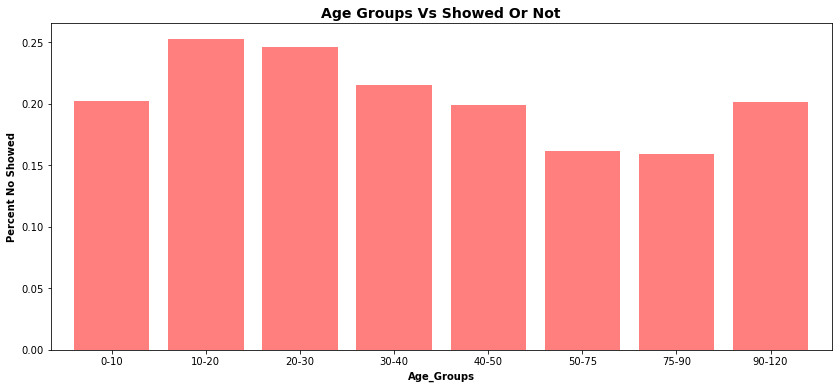

In [125]:
# then we will make a bar chart showing different age groups percent not showing-up
age_group_percent_notshowed.plot(alpha=0.5, rot=0, color= 'red', kind = 'bar', figsize=[14,6], width=0.8)
plt.title('age groups vs showed or not'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('age_groups in years'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('percent no showed'.title(),
               fontsize = 10, weight = "bold");

We can conclude that of all age groups the highest percent of not_showing is in age 10-30 
and most age groups with lowest percent of not_showing are in 50-90 year old

<a id='conclusions'></a>
## Conclusions

> As regards to questions asked above we can say age didn't have impact in foreseeing no-showups as well as SMS

> We can conclude that of all age groups the highest percent of not_showing is in age 10-30 
and most age groups with lowest percent of not_showing are in 50-90 year old

> There is always limitations when performing analysis as this is sample not whole population so infering results to the whole population is limited and can be done cautiously

> There are multiple entries where age is 0 and we cannot tell wheather these individuals are less than 1 year old or this is data error. in this study we assumed the first

> Further exploration may be needed to check for any possible predictors of no show-ups and another samples and studies are neede to confirm the results